# Task 1:Predict the percentage of a student based on the no. of study hours. 
## Author: Rushi Redkar

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(12)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


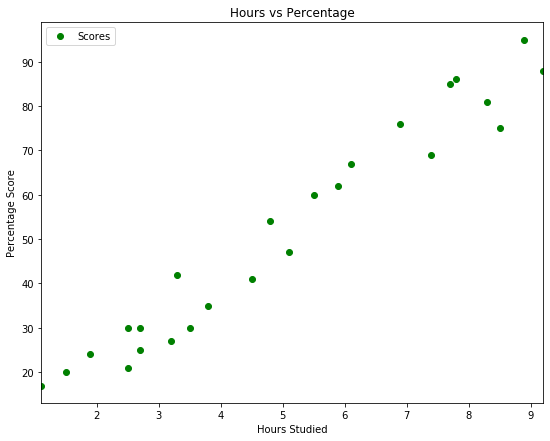

In [12]:
s_data.plot(x='Hours', y='Scores', style='go', figsize=(9,7))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing Data for Modelling

In [13]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Training the Algorithm

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


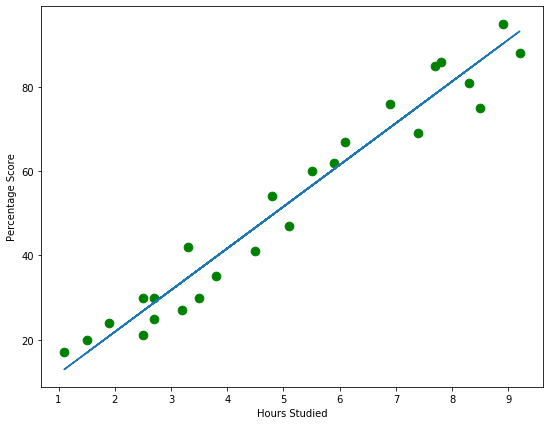

In [51]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(9,7))
plt.scatter(X, y,color='g',s=75)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Making Predictions

In [31]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [42]:
hours = 8
own_pred = regressor.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 8
Predicted Score = 81.30341188657258


### Evaluating the Model

In [45]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665
Mean Squared Error: 21.5987693072174


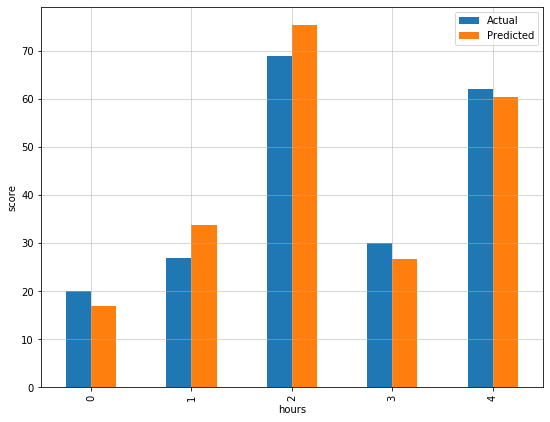

In [56]:
df.plot(kind='bar',figsize=(9,7))
plt.grid(linewidth='0.5')
plt.grid(linewidth='0.5')
plt.xlabel("hours")
plt.ylabel("score")
plt.show()